# Question A4

In this section, we will understand the utility of such a neural network in real world scenarios.

#### Please use the real record data named ‘record.wav’  as a test sample. Preprocess the data using the provided preprocessing script (data_preprocess.ipynb) and prepare the dataset.
Do a model prediction on the sample test dataset and obtain the predicted label using a threshold of 0.5. The model used is the optimized pretrained model using the selected optimal batch size and optimal number of neurons.
Find the most important features on the model prediction for the test sample using SHAP. Plot the local feature importance with a force plot and explain your observations.  (Refer to the documentation and these three useful references:
https://christophm.github.io/interpretable-ml-book/shap.html#examples-5,
https://towardsdatascience.com/deep-learning-model-interpretation-using-shap-a21786e91d16,  
https://medium.com/mlearning-ai/shap-force-plots-for-classification-d30be430e195)



1. Firstly, we import relevant libraries.

In [1164]:
import tqdm
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

from scipy.io import wavfile as wav

from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from common_utils import set_seed

# setting seed
set_seed()

To reduce repeated code, place your
network (MLP defined in QA1)
torch datasets (CustomDataset defined in QA1)
loss function (loss_fn defined in QA1)
in a separate file called common_utils.py

Import them into this file. You will not be repenalised for any error in QA1 here as the code in QA1 will not be remarked.

The following code cell will not be marked.


In [1165]:
from common_utils import MLP, split_dataset, preprocess_dataset, CustomDataset, loss_fn
import pandas as pd

def preprocess(df):
    
    X_train, y_train, X_test, y_test = split_dataset(df,['filename','label'],0.3,1)
    X_train_scaled, X_test_scaled = preprocess_dataset(X_train, X_test)

    return X_train_scaled, y_train, X_test_scaled, y_test

df = pd.read_csv('simplified.csv')
df['label'] = df['filename'].str.split('_').str[-2]

X_train, y_train, X_test, y_test = split_dataset(df,['filename','label'],0.3,1)

X_train_scaled, y_train, X_test_scaled, y_test = preprocess(df)

train_data = CustomDataset(X_train_scaled, y_train)
test_data = CustomDataset(X_test_scaled, y_test)

optimal_bs = 256
optimal_neurons = 256
model = MLP(77,optimal_neurons,1)

# reload model from saved state
model.load_state_dict(torch.load('model.pt'))
model.eval()

MLP(
  (mlp_stack): Sequential(
    (0): Linear(in_features=77, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=128, out_features=128, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.2, inplace=False)
    (9): Linear(in_features=128, out_features=1, bias=True)
    (10): Sigmoid()
  )
)

2. Install and import shap

In [1166]:
# YOUR CODE HERE
!pip install shap
import shap

3. Read the csv data preprocessed from 'record.wav', using variable name 'df', and fill the size of 'df' in 'size_row' and 'size_column'.

In [1167]:
df = 0
size_row = 0
size_column = 0
# YOUR CODE HERE

df = pd.read_csv('new_record.csv')
size_row = df.shape[0]
size_column = df.shape[1]

 4.  Preprocess to obtain the test data, save the test data as numpy array.

In [1168]:
from common_utils import preprocess_dataset

def preprocess(X_train, df):
    """preprocess your dataset to obtain your test dataset, remember to remove the 'filename' as Q1
    """
    # YOUR CODE HERE
    X_test_eg = df.drop(columns=['filename'])
    X_train_scaled, X_test_scaled_eg = preprocess_dataset(X_train, X_test_eg)

    return X_test_scaled_eg

X_test_scaled_eg = preprocess(X_train, df)

5. Do a model prediction on the sample test dataset and obtain the predicted label using a threshold of 0.5. The model used is the optimized pretrained model using the selected optimal batch size and optimal number of neurons. Note: Please define the variable of your final predicted label as 'pred_label'.

In [1169]:
threshold = 0.5
with torch.no_grad():
    prediction = model(torch.tensor(X_test_scaled_eg, dtype=torch.float))
    print(prediction)
    
    pred_label = 'Positive' if prediction > threshold else 'Negative'

print('The prediction is: ', pred_label)

tensor([[0.8140]])
The prediction is:  Positive


6. Find the most important features on the model prediction for your test sample using SHAP. Create an instance of the DeepSHAP which is called DeepExplainer using traianing dataset: https://shap-lrjball.readthedocs.io/en/latest/generated/shap.DeepExplainer.html.

Plot the local feature importance with a force plot and explain your observations.  (Refer to the documentation and these three useful references:
https://christophm.github.io/interpretable-ml-book/shap.html#examples-5,
https://towardsdatascience.com/deep-learning-model-interpretation-using-shap-a21786e91d16,  
https://medium.com/mlearning-ai/shap-force-plots-for-classification-d30be430e195)


Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


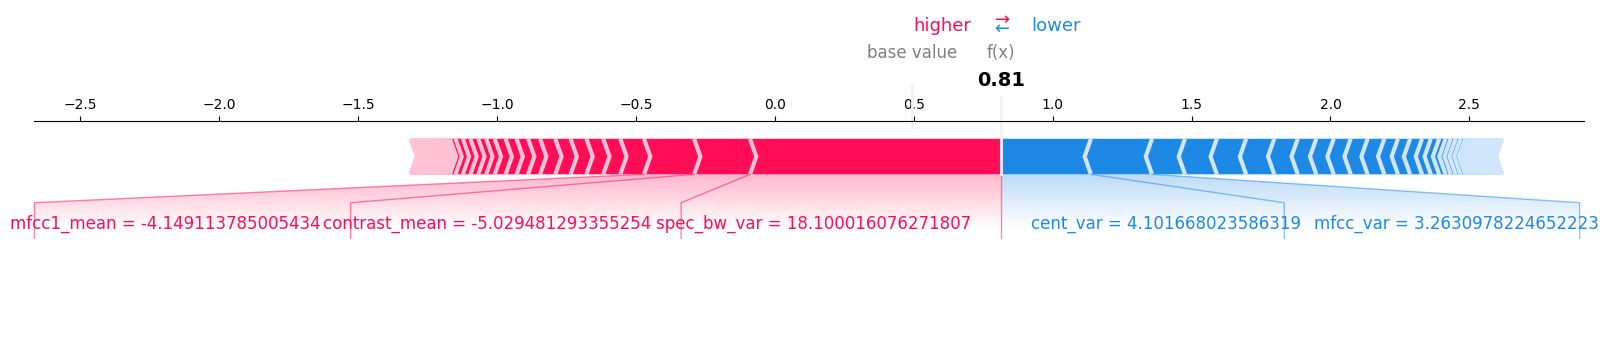

In [1170]:
'''
Fit the explainer on a subset of the data (you can try all but then gets slower)
Return approximate SHAP values for the model applied to the data given by X.
Plot the local feature importance with a force plot and explain your observations.
'''
# YOUR CODE HERE

# Convert X_test_scaled_eg to a DataFrame with feature names
feature_names = df.drop(columns=['filename']).columns.tolist()
X_test_df = pd.DataFrame(X_test_scaled_eg, columns=feature_names)

# Fit the explainer on a subset of the data
explainer = shap.DeepExplainer(model, torch.tensor(X_train_scaled).float())

# Compute SHAP values for the test data
shap_values = explainer.shap_values(torch.tensor(X_test_df.values).float())

# shap.initjs()

# Plot the force plot with feature names
shap.force_plot(explainer.expected_value, shap_values, X_test_df, matplotlib=True,show=False)
